In [1]:
import pandas as pd

In [2]:
XY = pd.read_csv("train.csv")
X_train = XY['headline']
X_train.head()

0    सचिन तेंडुलकरने बाळासाहेबांच्या आठवणींना दिला ...
1    बहुजन वंचित आघाडीची पहिली यादी जाहीर, प्रकाश आ...
2    गृहमंत्रिपद हे पार्ट टाइम नाही, राजीनामा द्या,...
3                  पुण्यात आघाडीचा पोपट पुन्हा जिवंत !
4    शरद पवार यांनी मिलिंद नार्वेकर यांच्या कानात क...
Name: headline, dtype: object

In [3]:
Y_train = XY['label']
Y_train.head()

0    state
1    state
2    state
3    state
4    state
Name: label, dtype: object

In [4]:
Y_train.dtype

dtype('O')

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
XY["encoded_train_label"] = label_encoder.fit_transform(XY["label"])

In [6]:
XY.head()

headline  ... encoded_train_label
0  सचिन तेंडुलकरने बाळासाहेबांच्या आठवणींना दिला ...  ...                   2
1  बहुजन वंचित आघाडीची पहिली यादी जाहीर, प्रकाश आ...  ...                   2
2  गृहमंत्रिपद हे पार्ट टाइम नाही, राजीनामा द्या,...  ...                   2
3                पुण्यात आघाडीचा पोपट पुन्हा जिवंत !  ...                   2
4  शरद पवार यांनी मिलिंद नार्वेकर यांच्या कानात क...  ...                   2

[5 rows x 3 columns]

In [7]:
XY[['label', 'encoded_train_label']].drop_duplicates(keep='first')

label  encoded_train_label
0           state                    2
7   entertainment                    0
12         sports                    1

In [8]:
Y_train = XY['encoded_train_label']

In [9]:
Y_train.head()

0    2
1    2
2    2
3    2
4    2
Name: encoded_train_label, dtype: int64

In [10]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
test_data = pd.read_csv("valid.csv")
test_data.head()

headline          label
0      पहाटे 3:30 वाजता बीग बींनी गायल 'हे' रॅप साँग  entertainment
1  राष्ट्रपती आणि पंतप्रधानांनी वाहिली श्रीदेवींन...  entertainment
2  सायरा बानोंना जागेसाठी धमकावणाऱ्या बिल्डराविरो...  entertainment
3  मुंबईत पहिल्यांदाच पन्नाशी पार, राज्यात सरासरी...          state
4  अण्णांची मनधरणी करण्यासाठी गिरीश महाजन राळेगणस...          state

In [11]:
X_test = test_data['headline']
X_test.head()

0        पहाटे 3:30 वाजता बीग बींनी गायल 'हे' रॅप साँग
1    राष्ट्रपती आणि पंतप्रधानांनी वाहिली श्रीदेवींन...
2    सायरा बानोंना जागेसाठी धमकावणाऱ्या बिल्डराविरो...
3    मुंबईत पहिल्यांदाच पन्नाशी पार, राज्यात सरासरी...
4    अण्णांची मनधरणी करण्यासाठी गिरीश महाजन राळेगणस...
Name: headline, dtype: object

In [12]:
test_data["encoded_train_label"] = label_encoder.fit_transform(test_data["label"])
test_data.head()

headline  ... encoded_train_label
0      पहाटे 3:30 वाजता बीग बींनी गायल 'हे' रॅप साँग  ...                   0
1  राष्ट्रपती आणि पंतप्रधानांनी वाहिली श्रीदेवींन...  ...                   0
2  सायरा बानोंना जागेसाठी धमकावणाऱ्या बिल्डराविरो...  ...                   0
3  मुंबईत पहिल्यांदाच पन्नाशी पार, राज्यात सरासरी...  ...                   2
4  अण्णांची मनधरणी करण्यासाठी गिरीश महाजन राळेगणस...  ...                   2

[5 rows x 3 columns]

In [13]:
y_test = test_data["encoded_train_label"]

In [14]:
X_test.shape

(2419,)

In [15]:
y_test.shape

(2419,)

In [ ]:
Y_train.value_counts()

2    6035
0    2644
1     994
Name: encoded_train_label, dtype: int64

In [16]:
X_train.head()

0    सचिन तेंडुलकरने बाळासाहेबांच्या आठवणींना दिला ...
1    बहुजन वंचित आघाडीची पहिली यादी जाहीर, प्रकाश आ...
2    गृहमंत्रिपद हे पार्ट टाइम नाही, राजीनामा द्या,...
3                  पुण्यात आघाडीचा पोपट पुन्हा जिवंत !
4    शरद पवार यांनी मिलिंद नार्वेकर यांच्या कानात क...
Name: headline, dtype: object

In [17]:
tokens = []
for sentence in X_train:
  all = sentence.split()
  tokens.append(all)

In [18]:
print(tokens)

[['सचिन', 'तेंडुलकरने', 'बाळासाहेबांच्या', 'आठवणींना', 'दिला', 'उजाळा'], ['बहुजन', 'वंचित', 'आघाडीची', 'पहिली', 'यादी', 'जाहीर,', 'प्रकाश', 'आंबेडकरांच्या', 'मतदारसंघावरुन', 'सस्पेंन्स', 'कायम'], ['गृहमंत्रिपद', 'हे', 'पार्ट', 'टाइम', 'नाही,', 'राजीनामा', 'द्या,', 'तृप्ती', 'देसाईंची', 'मुख्यमंत्र्यांवर', 'टीका'], ['पुण्यात', 'आघाडीचा', 'पोपट', 'पुन्हा', 'जिवंत', '!'], ['शरद', 'पवार', 'यांनी', 'मिलिंद', 'नार्वेकर', 'यांच्या', 'कानात', 'काय', 'सांगितलं', 'असेल?'], ['ग्रेट', 'भेटमध्ये', 'अंजली', 'भागवत', '-', 'भाग', '3'], ["'तारक", "मेहता..'चा", 'कलाकार', 'विशाल', 'ठक्कर', '11', 'दिवसांपासून', 'बेपत्ता'], ["'दंगल'मुळे", 'स्माॅल', 'स्क्रीन', 'थिएटर्सला', 'फायदा'], ['चाहत्याने', 'खांद्यावर', 'हात', 'ठेवताच', 'सोनू', 'निगमने', 'केलं', 'असं', 'काही', 'की', 'सारेच', 'झाले', 'अवाक्!'], ['जळगावातल्या', "'त्या'", 'नरभक्षक', 'बिबट्याने', 'आतापर्यंत', 'घेतलेत', '6', 'बळी'], ['मराठवाड्यात', 'पावसाचं', 'कमबॅक', ';', 'मुंबईसह', 'राज्यातही', 'संततधार'], ['हृतिक', 'करतोय', 'बायोपिक', "'सुपर", "30'"], [

In [19]:
from gensim.models import FastText
model_ted = FastText(tokens, size=300, window=5, min_count=5, workers=8,sg=1)

In [20]:
model_ted.wv['विकत']

array([-0.07847631,  0.06150624, -1.034863  ,  0.3107451 , -0.12026399,
       -0.0237421 , -0.3574921 ,  0.0542797 , -0.04838084, -0.4461719 ,
        0.04569783, -0.10536174,  0.10833248, -0.3030902 , -0.20245224,
        0.14007299, -0.36269224, -0.45643887,  0.20564932,  0.1250986 ,
       -0.07213578,  0.10295127, -0.12824629, -0.32350823,  0.2797725 ,
        0.11830103, -0.17719166, -0.07488254, -0.04370308, -0.31199637,
        0.19667804, -0.19268335,  0.04155089, -0.10550475, -0.08639102,
       -0.48183158, -0.40634453,  0.36268833, -0.34481692,  0.3216475 ,
       -0.03560976, -0.06014071, -0.27946553, -0.13307895,  0.1479659 ,
       -0.03804304, -0.36397168,  0.33301517, -0.03898582, -0.44389534,
        0.01510021,  0.16214737, -0.3443662 , -0.52741766,  0.09123389,
       -0.8077645 ,  0.13182849, -0.6759515 ,  0.12877701, -0.18750663,
       -0.303102  , -0.26537338,  0.57855296, -0.10568509,  0.19946714,
        0.04442184,  0.09734622, -0.03861909, -0.03550216,  0.05

In [21]:
model_ted.wv.most_similar('खेळाडू')

[('खेळाडूने', 0.9999924898147583),
 ('विक्रम', 0.9999823570251465),
 ('वाढदिवसाला', 0.9999819397926331),
 ('क्रिकेटचा', 0.9999814629554749),
 ('क्रिकेट', 0.9999813437461853),
 ('विक्रमी', 0.9999803304672241),
 ('विराटची', 0.999980092048645),
 ('परीक्षेत', 0.999980092048645),
 ('ला', 0.9999799728393555),
 ('ऑस्ट्रेलियावर', 0.9999799132347107)]

In [ ]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Embedding, Input, Dense, LSTM, Dropout, Flatten, Bidirectional, Conv1D, concatenate, SpatialDropout1D
from tensorflow.keras.layers import MaxPooling1D, MaxPooling2D, GlobalMaxPooling1D, GlobalAveragePooling2D, GlobalAveragePooling1D 
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler, EarlyStopping

In [ ]:
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
from keras import layers
from keras.models import Sequential

EPOCHS= 30
act= "relu"
opt= tf.keras.optimizers.Adam(learning_rate=0.001)

In [23]:
XY['headline'].info()

AttributeError: ignored

In [ ]:
tokenizer = Tokenizer();
tokenizer.fit_on_texts(XY['headline'])

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train[0]

[210, 4947, 8191, 4948, 66, 4949]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_size

24017

In [ ]:
import numpy as np

In [ ]:
lens_train = [len(i) for i in X_train]
lens_test = [len(i) for i in X_test]
lens = lens_train + lens_test

maxlen = np.max(lens)
print('Max len:', maxlen)

Max len: 22


In [ ]:
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
X_train[0]

array([ 210, 4947, 8191, 4948,   66, 4949,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

In [ ]:
word_index = tokenizer.word_index
embedding_matrix = np.random.random((vocab_size, 300))
for word,i in word_index.items():
    try:
        embedding_vector = model_ted.wv[word]
    except:
        print(word, 'not found')
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

' not found
ipl not found
ibn not found
अ not found
0 not found
अबब not found
indvsaus not found
aus not found
fifa not found
’ not found
3' not found
४ not found
ftii not found
'2 not found
icc not found
world not found
bcci not found
breaking not found
१ not found
cwg not found
शॉ not found
टू not found
एटीएम not found
wwe not found
32 not found
90 not found
attack not found
२० not found
indvsnz not found
'3 not found
85 not found
ल not found
इथे not found
cctv not found
'नो not found
pm not found
wc not found
73 not found
42 not found
37 not found
odi not found
results not found
70 not found
33 not found
छळ not found
अँड not found
29 not found
औषध not found
49 not found
सैफ not found
९ not found
७ not found
ठळक not found
१५ not found
nz not found
mim not found
87 not found
१६ not found
७० not found
उभे not found
६ not found
65 not found
76 not found
वय not found
t not found
इयर not found
ख not found
kader not found
bendre not found
ए not found
ips not found
८ not found
एम not found


In [ ]:
result = model_ted.wv.most_similar(positive=['बाळासाहेबांच्या', 'शरद'], negative=['पवार'], topn=1)
print(result)

[('पहिल्या', 0.9988096356391907)]


In [ ]:
embedding_dim = 300

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights = [embedding_matrix], input_length=maxlen))
model.add(layers.Dropout(0.3)) 
model.add(layers.Conv1D(filters=32, kernel_size=3, activation=act)) 
model.add(layers.MaxPool1D(pool_size=3)) 
model.add(layers.Dropout(0.35))
model.add(layers.Bidirectional(layers.LSTM(256, recurrent_dropout=0.3)))
model.add(layers.Dropout(0.35))
model.add(layers.Dense(256,activation=act)) 
model.add(layers.Dropout(0.3)) 
model.add(layers.Dense(64,activation=act)) 
model.add(layers.Dropout(0.3)) 
model.add(layers.Dense(3, activation="softmax"))
model.compile(optimizer=opt, loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 22, 300)           7205100   
                                                                 
 dropout_10 (Dropout)        (None, 22, 300)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 20, 32)            28832     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 6, 32)            0         
 1D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 6, 32)             0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 512)              591872    
 nal)                                                 

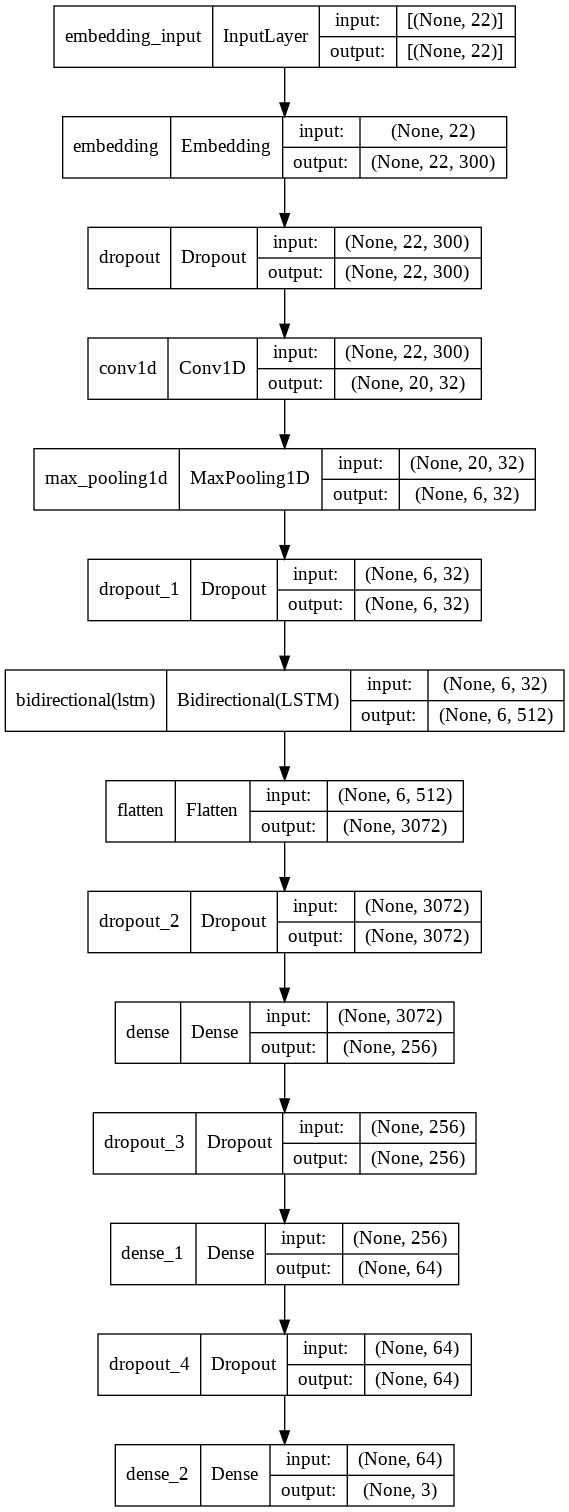

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
dummy_y_test = np_utils.to_categorical(y_test)
dummy_y_train = np_utils.to_categorical(Y_train)

In [ ]:
checkpoint_filepath = './Checkpoint/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = model.fit(X_train, dummy_y_train, epochs=10, verbose=1, validation_data=(X_test, dummy_y_test), batch_size=128, callbacks=[model_checkpoint_callback]) 
loss, accuracy = model.evaluate(X_train, dummy_y_train, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, dummy_y_test, verbose=0)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/10
76/76 [==============================] - 29s 305ms/step - loss: 0.9007 - accuracy: 0.6151 - val_loss: 0.8090 - val_accuracy: 0.5829
Epoch 2/10
76/76 [==============================] - 23s 300ms/step - loss: 0.5783 - accuracy: 0.7780 - val_loss: 0.5618 - val_accuracy: 0.7979
Epoch 3/10
76/76 [==============================] - 23s 300ms/step - loss: 0.3152 - accuracy: 0.8822 - val_loss: 0.5395 - val_accuracy: 0.8152
Epoch 4/10
76/76 [==============================] - 22s 289ms/step - loss: 0.1686 - accuracy: 0.9458 - val_loss: 0.6039 - val_accuracy: 0.8193
Epoch 5/10
76/76 [==============================] - 21s 282ms/step - loss: 0.0954 - accuracy: 0.9727 - val_loss: 0.6337 - val_accuracy: 0.8160
Epoch 6/10
76/76 [==============================] - 22s 290ms/step - loss: 0.0596 - accuracy: 0.9852 - val_loss: 0.6533 - val_accuracy: 0.8210
Epoch 7/10
76/76 [==============================] - 23s 300ms/step - loss: 0.0421 - accuracy: 0.9900 - val_loss: 0.7014 - val_accuracy: 0.8260

In [ ]:
np.argmax(classifier.predict(np.array([X_test[0]])))

NameError: ignored

In [ ]:
XY = pd.read_csv('valid.csv')
X_Valid = XY['headline']
XY["encoded_train_label"] = label_encoder.fit_transform(XY["label"])
dummy_y_valid = np_utils.to_categorical(XY["encoded_train_label"])
X_Valid = tokenizer.texts_to_sequences(X_Valid)

In [ ]:
dummy_y_valid[2]

array([1., 0., 0.], dtype=float32)

In [ ]:
X_Valid[2]
X_Valid = pad_sequences(X_Valid, padding='post', maxlen=maxlen)

In [ ]:
loss, accuracy = model.evaluate(X_Valid, dummy_y_valid, verbose=1)
print("Validation Accuracy: {:.4f}".format(accuracy))

76/76 [==============================] - 1s 18ms/step - loss: 0.7697 - accuracy: 0.8371
Validation Accuracy: 0.8371


In [ ]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Embedding, Input, Dense, LSTM, Dropout, Flatten, Bidirectional, Conv1D, concatenate, SpatialDropout1D
from tensorflow.keras.layers import MaxPooling1D, MaxPooling2D, GlobalMaxPooling1D, GlobalAveragePooling2D, GlobalAveragePooling1D 
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler, EarlyStopping

In [ ]:
Input1 = Input(shape=(maxlen,))
Embedding_layer1 = Embedding(input_dim=vocab_size,output_dim=300,weights=[embedding_matrix])(Input1)

# Input 1(BiLSTM):
Lstm = Bidirectional(LSTM(256, dropout=0.3, return_sequences=True))(Embedding_layer1)

# Input 2 (CNN):
Conv1 = Conv1D(filters=512, kernel_size=3, activation='relu', padding='same')(Embedding_layer1)
Dropout1 = Dropout(0.3)(Conv1)
Conv2 = Conv1D(filters=512, kernel_size=4, activation='relu', padding='same')(Embedding_layer1)
Dropout2 = Dropout(0.3)(Conv2)
Conv3 = Conv1D(filters=512, kernel_size=5, activation='relu', padding='same')(Embedding_layer1)
Dropout3 = Dropout(0.3)(Conv3)
merged = concatenate([Dropout1, Dropout2, Dropout3], axis=1)
max_pool = MaxPooling1D(pool_size=3)(merged)

attention = AttentionLayer()([Lstm, max_pool])
Dense1 = Dense(64, activation='relu')(attention)
Dropout_dense = Dropout(0.25)(Dense1)
outputs = Dense(3, activation='softmax')(Dropout_dense)

classifier = Model(inputs=Input1, outputs=outputs)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
classifier.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 22)]         0           []                               
                                                                                                  
 embedding_7 (Embedding)        (None, 22, 300)      7205100     ['input_5[0][0]']                
                                                                                                  
 conv1d_15 (Conv1D)             (None, 22, 512)      461312      ['embedding_7[0][0]']            
                                                                                                  
 conv1d_16 (Conv1D)             (None, 22, 512)      614912      ['embedding_7[0][0]']            
                                                                                            

In [ ]:
class AttentionLayer(Layer):
    
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)
        
        
    def build(self, attention_input):
        super(AttentionLayer, self).build(attention_input)
        lstm_shape, cnn_shape = attention_input
        # Attention Weights for LSTM
        self.W_in = self.add_weight(shape=(lstm_shape[-1], 1),
                                    initializer='glorot_normal',
                                    trainable=True,
                                    name='input_attention_weights')
        
        # Attention Weights for CNN
        self.W_context = self.add_weight(shape=(cnn_shape[-1], 1),
                                         initializer='glorot_normal',
                                         trainable=True,
                                         name='context_attention_weights')
                                      
        # Attention Bias
        self.b = self.add_weight(shape=(lstm_shape[1], 1),
                                 initializer='glorot_normal',
                                 trainable=True,
                                 name='attention_bias')
        
        
        
    def call(self, attention_input):
        lstm_output, cnn_output = attention_input
        et = K.squeeze(K.tanh(K.dot(lstm_output, self.W_in) + 
                              K.dot(cnn_output, self.W_context) +
                              self.b), axis=-1)
        at = K.expand_dims(K.softmax(et), axis=-1)
        attention_output = at * lstm_output
        attention_output = K.sum(attention_output, axis=1)
        return attention_output
    
    def get_config(self):
        return super(AttentionLayer, self).get_config()

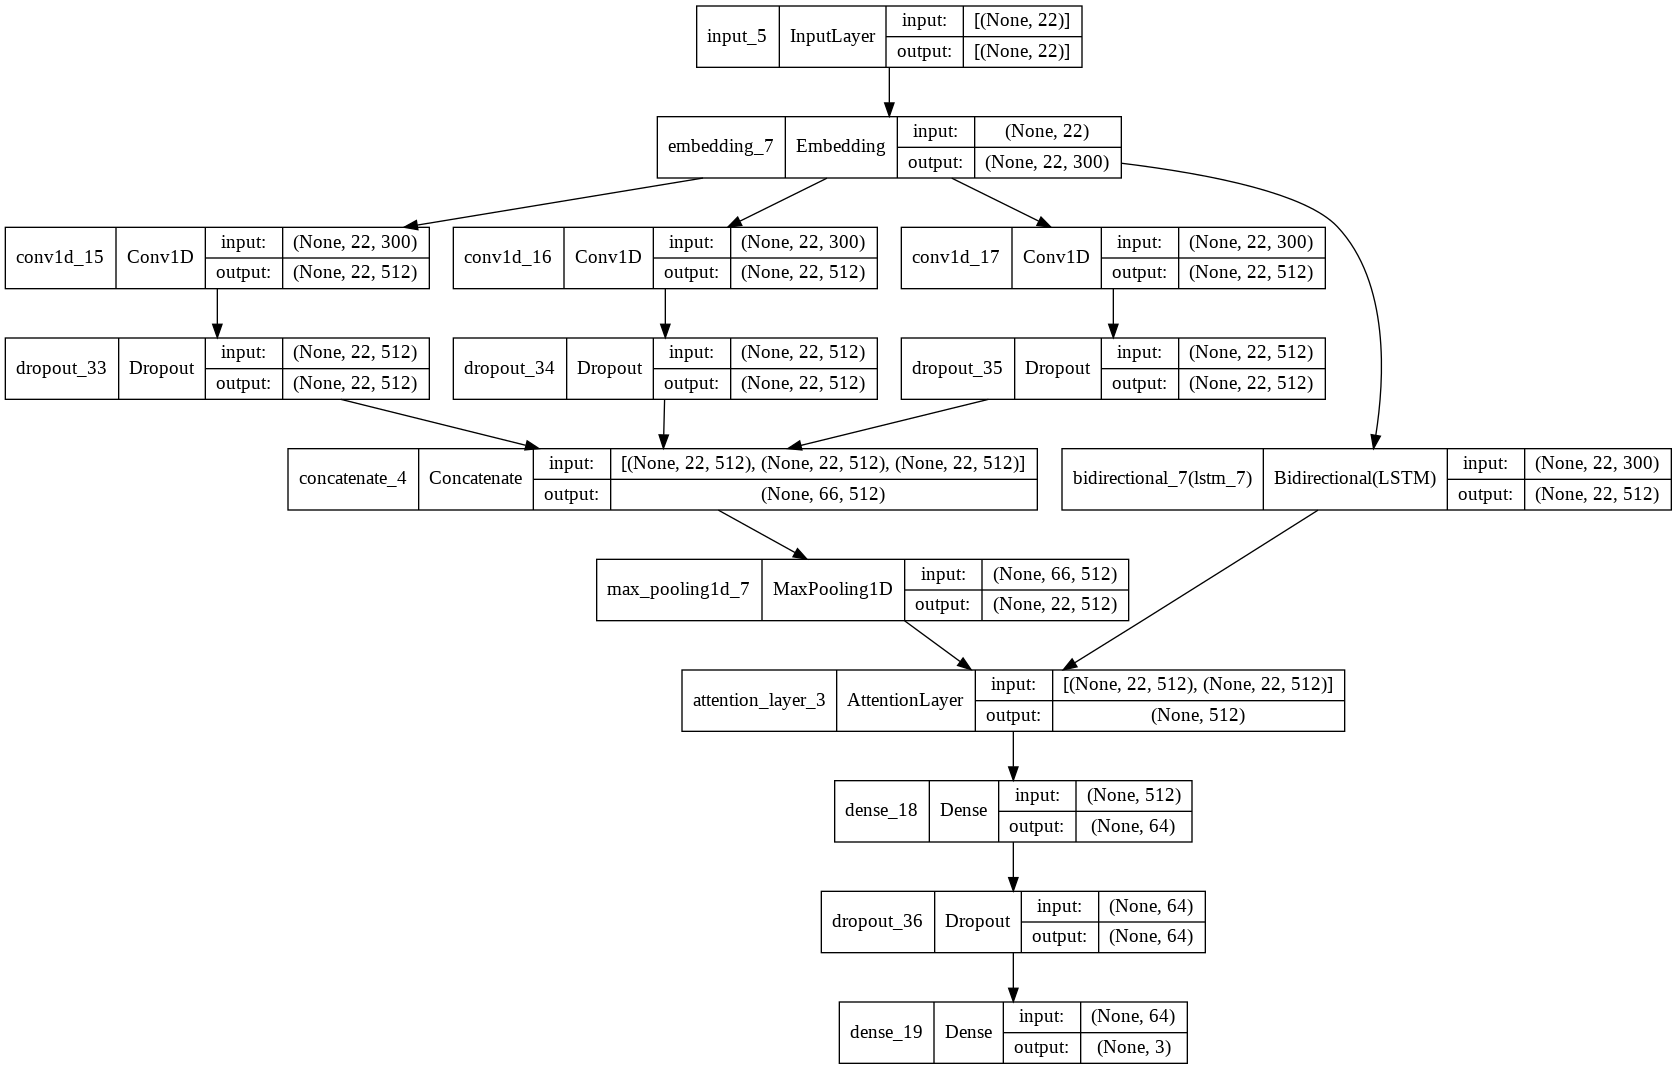

In [ ]:
plot_model(classifier, show_shapes=True)

In [ ]:
checkpoint_filepath = "./Checkpoint/checkpoint'"
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,
                                            save_weights_only=True,
                                            monitor='val_acc',
                                            mode='max',
                                            save_freq = 'epoch',
                                            save_best_only=True)

# Reduce Learning Rate on Plateau Callback:
reduce_lr_callback = ReduceLROnPlateau( monitor='val_acc', 
                                       factor=0.1, 
                                       patience=2, 
                                       min_lr=0.0005, 
                                       verbose=1)

Es = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)

In [ ]:
history = classifier.fit(X_train, dummy_y_train, epochs=30, verbose=1, validation_data=(X_test, dummy_y_test), batch_size=128,callbacks=[model_checkpoint_callback, reduce_lr_callback, Es])

Epoch 1/30
76/76 [==============================] - 134s 2s/step - loss: 0.0036 - acc: 0.9983 - val_loss: 0.5026 - val_acc: 0.8867 - lr: 5.0000e-04
Epoch 2/30
76/76 [==============================] - 134s 2s/step - loss: 0.0038 - acc: 0.9978 - val_loss: 0.5409 - val_acc: 0.8958 - lr: 5.0000e-04
Epoch 3/30
53/76 [===================>..........] - ETA: 40s - loss: 0.0044 - acc: 0.9984

In [ ]:
loss, accuracy = classifier.evaluate(X_train, dummy_y_train, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = classifier.evaluate(X_test, dummy_y_test, verbose=0)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9983
Testing Accuracy:  0.8896


In [ ]:
loss, accuracy = classifier.evaluate(X_Valid, dummy_y_valid, verbose=1)
print("Validation Accuracy: {:.4f}".format(accuracy))

76/76 [==============================] - 8s 106ms/step - loss: 0.4981 - acc: 0.8896
Validation Accuracy: 0.8896


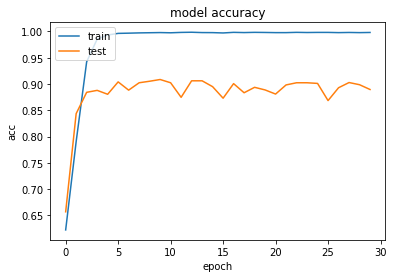

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from time import process_time
from joblib import dump
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.ldamodel import LdaModel

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

In [ ]:
X_train[0]

array([ 210, 4947, 8191, 4948,   66, 4949,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0], dtype=int32)

In [ ]:
out = classifier.predict(X_train[0])

ValueError: ignored

In [ ]:
np.argmax(classifier.predict(X_train[0]),axis=1)

ValueError: ignored

In [ ]:
predictions =  np.argmax(classifier.predict(np.array([X_test[0]])))
print(predictions)

0


In [ ]:
X_test[0].dtype

dtype('int32')

In [ ]:
 X_test.shape

(2419, 22)

In [ ]:
X_test.dtype

dtype('int32')

In [ ]:
print(classifier.confusion_matrix(y_test, y_pred_class))